In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 4s 2us/step


In [15]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [38]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [44]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [45]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history = model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512, validation_data=(x_val, y_val))

Train on 8982 samples, validate on 1000 samples
Epoch 1/9
8982/8982 [==============================] - 1s 163us/step - loss: 2.5242 - acc: 0.5238 - val_loss: 1.5438 - val_acc: 0.6820
Epoch 2/9
8982/8982 [==============================] - 1s 132us/step - loss: 1.3516 - acc: 0.7197 - val_loss: 1.0288 - val_acc: 0.7930
Epoch 3/9
8982/8982 [==============================] - 1s 131us/step - loss: 0.9983 - acc: 0.7890 - val_loss: 0.7681 - val_acc: 0.8370
Epoch 4/9
8982/8982 [==============================] - 1s 138us/step - loss: 0.7822 - acc: 0.8344 - val_loss: 0.5960 - val_acc: 0.8840
Epoch 5/9
8982/8982 [==============================] - 1s 139us/step - loss: 0.6249 - acc: 0.8699 - val_loss: 0.4640 - val_acc: 0.9110
Epoch 6/9
8982/8982 [==============================] - 1s 150us/step - loss: 0.5020 - acc: 0.8975 - val_loss: 0.3736 - val_acc: 0.9240
Epoch 7/9
8982/8982 [==============================] - 1s 136us/step - loss: 0.4019 - acc: 0.9149 - val_loss: 0.3095 - val_acc: 0.9400
Epoch 8

In [48]:
result = model.evaluate(x_test, one_hot_test_labels)
print(result)

2246/2246 [==============================] - 0s 110us/step
[0.930219584453987, 0.800979519145147]


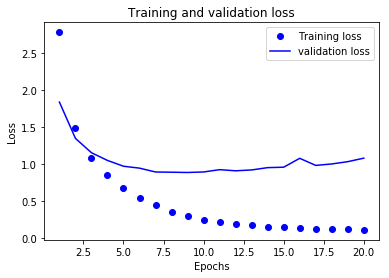

In [33]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

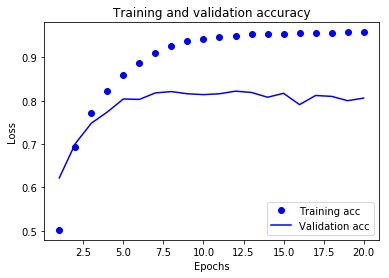

In [34]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()